# Introdução

**Resumo:**

O exemplo aqui desenvolvido tem como objetivo apresentar conceitos iniciais de implementação de redes neurais com python e tensorflow/keras. Esse exemplo mostra o uso da arquitetura clássica ResNet50, disponível no keras, pré-treinada no dataset do ImageNet para reconhecimento de imagens. Alguns exemplos de imagens são buscados da internet para teste.

**Não é objetivo nosso desenvolver e otimizar o modelo de classificação**. O exemplo tem objetivo meramente didático.

---

**Para saber mais:**
* [Palestras e cursos do Ocean](http://www.oceanbrasil.com/)
* François Chollet. Deep Learning with Python. Manning Publications, 2017.
* Ian Goodfellow and Yoshua Bengio and Aaron Courville. [Deep Learning](https://www.deeplearningbook.org/). MIT Press, 2016.

In [1]:
#Importando Libs
import tensorflow
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
# Plot
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Carregando o modelo ResNet pré-treinado no ImageNet
model = ResNet50(weights='imagenet')

In [11]:
#Buscando alguma imagem da Internet
import requests

url = 'https://fotos.jornaldocarro.estadao.com.br/uploads/2020/01/03062028/Onix-2020-Hatch-2-1160x774.jpg'
url1 = 'https://quatrorodas.abril.com.br/wp-content/uploads/2019/04/imagem7-e1584036891780.jpg?quality=70&strip=info'
url = 'https://www.calimaro.com.br/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/s/h/shelter-violao-de-aco-auditorium-sag500prsx-nm-natural-matte-principal.jpg'
ur = 'https://http2.mlstatic.com/lote-com-4-peixe-palhaco-ocelaris-com-brinde-marinho-D_NQ_NP_900038-MLB27109155440_032018-F.webp' #peixe
r1 = requests.get(url1, allow_redirects=True)

open('test.jpg', 'wb').write(r1.content) #salva a imagem no arquivo test.jpg

895461

In [13]:
# Abrindo arquivo salvo e colocando no formato da Resnet
img_path = './test.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) #pre-processamento 

preds = model.predict(x)
# Resultados como uma lista de (classid, descrição, probabilidade).
print('Predicted:', decode_predictions(preds, top=3)[0])

FileNotFoundError: ignored

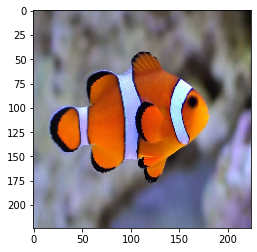

In [10]:
#Visualizando
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img)

In [7]:
#Mas como é esse modelo?
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________